<h1>TEAMID: PNT2022TMID10901</h1>

<h2>Visualizing and Predicting Heart Diseases with an Interactive Dashboard</h2>


<h2>Heart Disease Prediction using Machine Learning Approach</h2>

Heart Disease (including Coronary Heart Disease, Hypertension, and Stroke) remains the No. 1 cause of death in the US.The Heart Disease and Stroke Statistics—2019 Update from the American Heart Association indicates that:

<li>116.4 million, or 46% of US adults are estimated to have hypertension. These are findings related to the new 2017 Hypertension Clinical Practice Guidelines.</li>
<li>On average, someone dies of CVD every 38 seconds. About 2,303 deaths from CVD each day, based on 2016 data.</li>
<li>On average, someone dies of a stroke every 3.70 minutes. About 389.4 deaths from stroke each day, based on 2016 data.</li>
In this machine learning project, we have collected the dataset from UCI (https://archive.ics.uci.edu/ml/datasets/statlog+(heart)) and we will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.

<h3>problem Statement</h3>

<li>Complete analysis of Heart Disease UCI dataset.</li>
<li>To predict whether a person has a heart disease or not based on the various biological and physical parameters.</li>

<h3>Machine Learning Algorithms</h3>

<li>Random Forest Classifier</li>
<li>K-Nearest Neighbors Classifier</li>
<li>Decision Tree Classifier</li>
<li>Naive Bayes Classifier</li>

<h3>Import libraries</h3>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<h2>Reading the Dataset</h2>

In [5]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='5i6ow0P4tpnCXrwPmHgjOlvS_22JMaJwUe39DOIQ-wz8',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'visualizingandpredictingheartdise-donotdelete-pr-dhoozkeqjwqosc'
object_key = 'Heart_Disease_Prediction.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [6]:
data.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [7]:
print(f'No of Rows in the dataset : {data.shape[0]}')
print(f'No of Columns in the dataset : {data.shape[1]}')

No of Rows in the dataset : 270
No of Columns in the dataset : 14


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [9]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


<h3>Data Visualization</h3>


In [10]:
data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

<h3>Univariate Analysis</h3>

<h4>Age</h4>

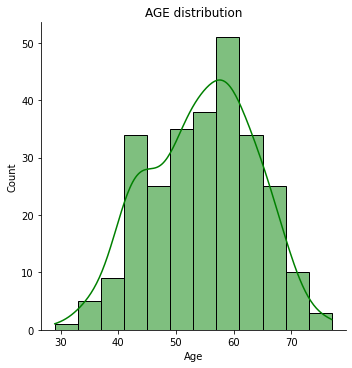

In [11]:
sns.displot(x=data["Age"], kde=True, color='green')
plt.title("AGE distribution");

<h4>Sex</h4>

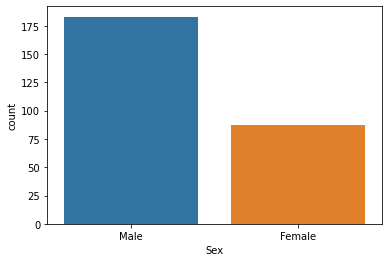

In [12]:
labels = ['Male', 'Female']
order = data['Sex'].value_counts().index

sns.countplot(x='Sex', data=data, order=order)
plt.xticks([0, 1], labels)
plt.show()

<h4>Chest pain type</h4>

In [13]:
data['Chest pain type'].value_counts()


4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

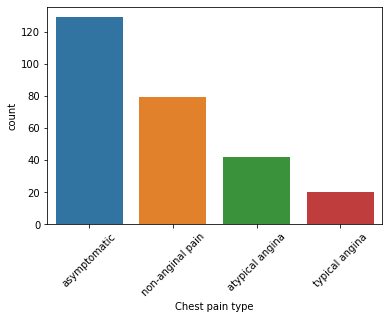

In [14]:
labels = ["asymptomatic","non-anginal pain","atypical angina","typical angina"]
order = data['Chest pain type'].value_counts().index

sns.countplot(x='Chest pain type', data=data, order=order)
plt.xticks([0,1,2,3], labels, rotation=45)
plt.show()

<h4>BP</h4>

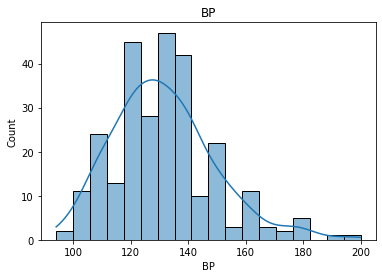

In [15]:
sns.histplot(x=data["BP"],kde=True)
plt.title("BP");

<h4>Cholesterol</h4>

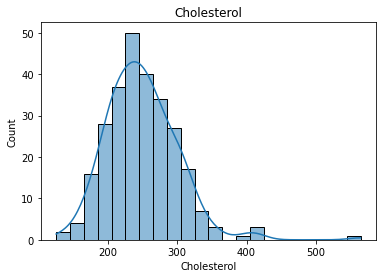

In [16]:
sns.histplot(x=data["Cholesterol"],kde=True)
plt.title("Cholesterol");

<h4>FBS over 120</h4>

In [17]:
data['FBS over 120'].value_counts()

0    230
1     40
Name: FBS over 120, dtype: int64

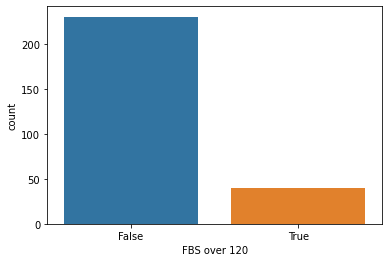

In [18]:
labels = ["False", 'True']
order = data['FBS over 120'].value_counts().index

sns.countplot(x='FBS over 120', data=data, order=order)
plt.xticks([0,1], labels=labels)
plt.show()

<h4>Cholesterol</h4>

In [19]:
data['EKG results'].value_counts()

2    137
0    131
1      2
Name: EKG results, dtype: int64

<h3>Data Visualization</h3>

<h4>Distribution of Heart disease (target variable)</h4>

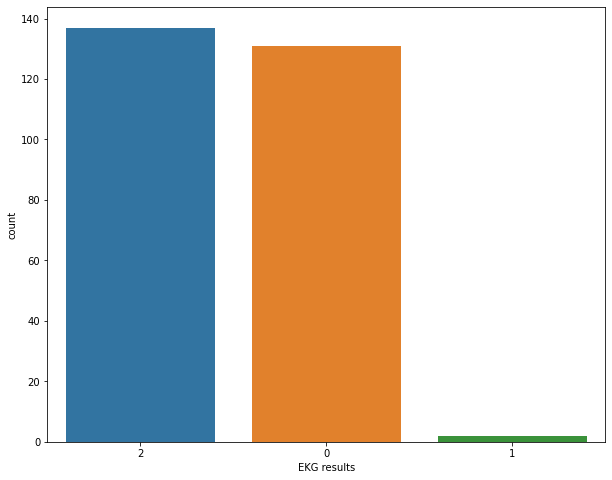

In [20]:
labels = ["showing probable or definite left ventricular hypertrophy by Estes' criteria", "normal",
         "having ST-T wave abnormality"]
order = data['EKG results'].value_counts().index

plt.figure(figsize=(10, 8))
sns.countplot(x='EKG results', data=data, order=order)
#plt.xticks([0,1,2], labels=labels)
plt.show()

<h4>Max HR</h4>

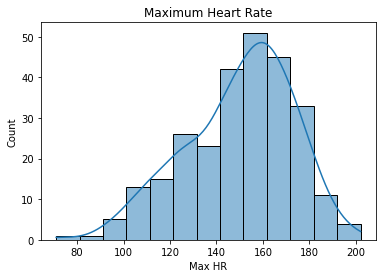

In [21]:
sns.histplot(x=data["Max HR"],kde=True)
plt.title("Maximum Heart Rate");

<h4>Exercise angina</h4>

In [22]:
data['Exercise angina'].value_counts()

0    181
1     89
Name: Exercise angina, dtype: int64

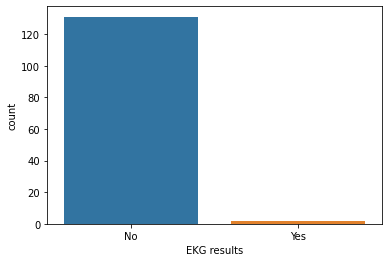

In [23]:
labels = ["No", "Yes"]
order = data['Exercise angina'].value_counts().index

sns.countplot(x='EKG results', data=data, order=order)
plt.xticks([0,1], labels=labels)
plt.show()

<h4>ST depression</h4>

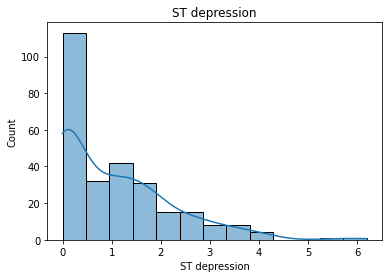

In [24]:
sns.histplot(x=data["ST depression"],kde=True)
plt.title("ST depression");

<h4>Slope of ST</h4>

In [25]:
data['Slope of ST'].value_counts()

1    130
2    122
3     18
Name: Slope of ST, dtype: int64

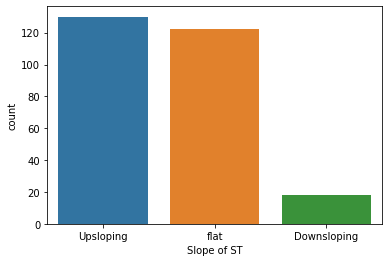

In [26]:
labels = ["Upsloping", "flat","Downsloping"]
order = data['Slope of ST'].value_counts().index

sns.countplot(x='Slope of ST', data=data, order=order)
plt.xticks([0,1,2], labels=labels)
plt.show()

<h4>Number of vessels fluro</h4>

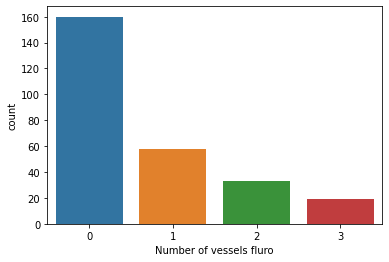

In [27]:
sns.countplot(x='Number of vessels fluro', data=data);

<h4>Thallium</h4>

In [28]:
data['Thallium'].value_counts()

3    152
7    104
6     14
Name: Thallium, dtype: int64

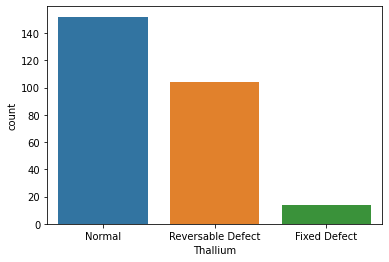

In [29]:
labels = ["Normal","Reversable Defect","Fixed Defect"]
order = data['Thallium'].value_counts().index

sns.countplot(x='Thallium', data=data, order=order)
plt.xticks([0,1,2], labels=labels)
plt.show()

<h3>Bivariate Analysis</h3>

In [30]:
cols = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium']
cols

['Age',
 'Sex',
 'Chest pain type',
 'BP',
 'Cholesterol',
 'FBS over 120',
 'EKG results',
 'Max HR',
 'Exercise angina',
 'ST depression',
 'Slope of ST',
 'Number of vessels fluro',
 'Thallium']

[]

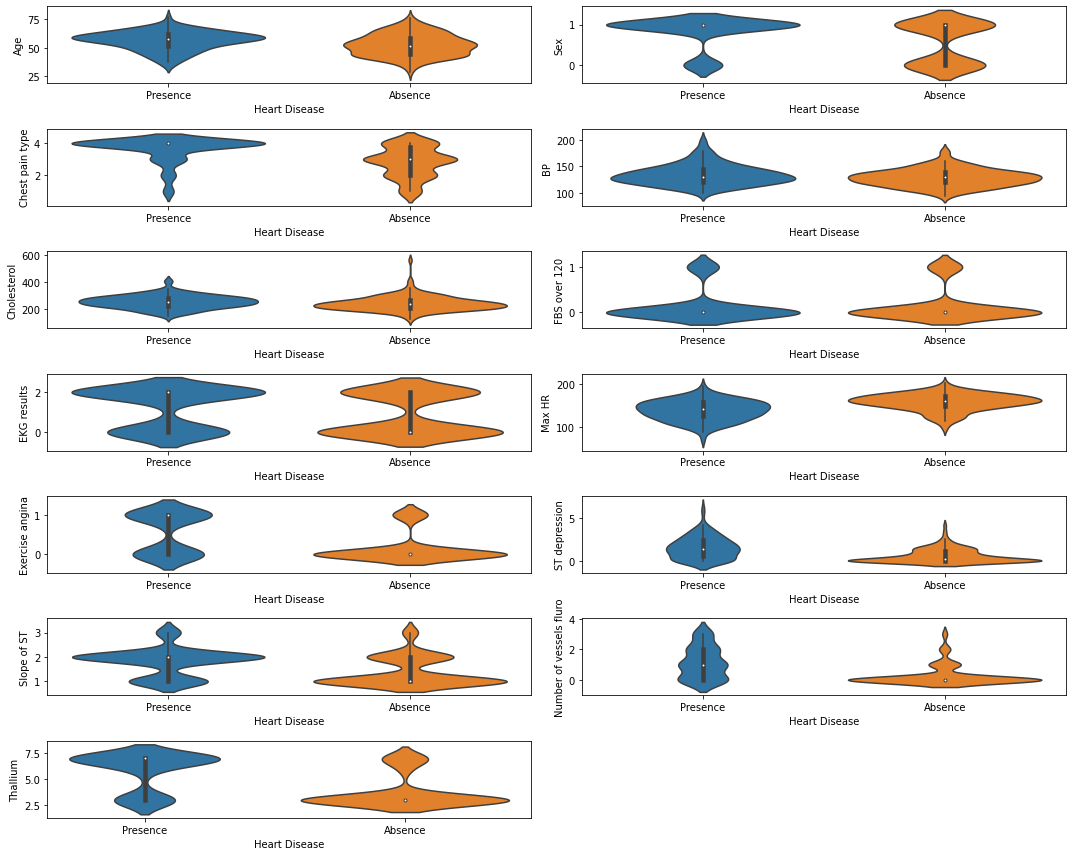

In [31]:
plt.figure(figsize=(15, 12))
for i in range(len(cols)):
    plt.subplot(7, 2, i+1)
    sns.violinplot(x="Heart Disease", y=cols[i], data=data)
plt.tight_layout()   
plt.plot()

<h3>Multi-Variate Analysis</h3>

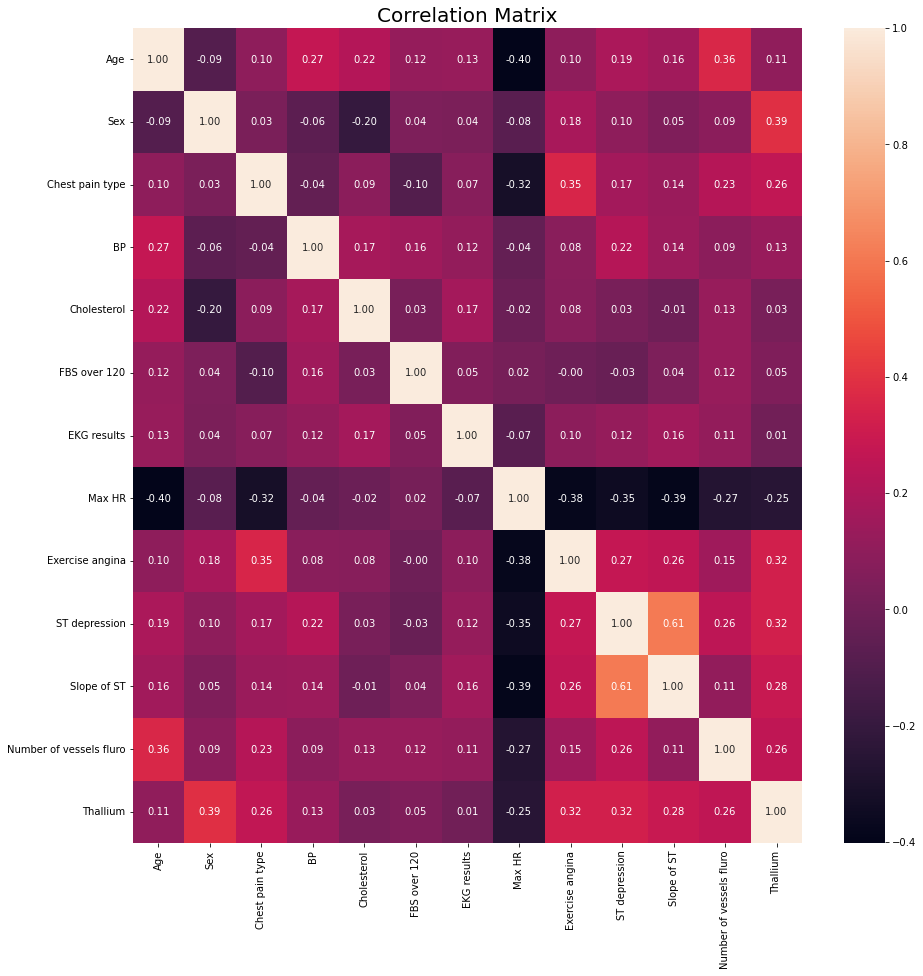

In [32]:
corr_matrix = data.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix,annot=True,fmt='0.2f')
plt.title("Correlation Matrix", fontsize = 20)
plt.show()

<h3>Split the data</h3>

In [33]:
data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [34]:
x = data.iloc[:,0:13]
y = data['Heart Disease'].replace({"Absence":0,"Presence":1})

In [35]:
x.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


In [36]:
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64

<h3>Scale the independent variables</h3>

<h3>Split the data into training and testing</h3>

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.10)

In [38]:
print(f'x_train contains: {x_train.shape[0]} rows and {x_train.shape[1]} columns')
print(f'x_test contains: {x_test.shape[0]} rows and {x_test.shape[1]} columns')

x_train contains: 243 rows and 13 columns
x_test contains: 27 rows and 13 columns


In [39]:
print(f'y_train contains: {y_train.shape}')
print(f'y_test contains: {y_test.shape}')

y_train contains: (243,)
y_test contains: (27,)


In [40]:
print(f'x_train contains: {x_train.shape[0]} rows and {x_train.shape[1]} columns')
print(f'x_test contains: {x_test.shape[0]} rows and {x_test.shape[1]} columns')

x_train contains: 243 rows and 13 columns
x_test contains: 27 rows and 13 columns


In [41]:
print(f'y_train contains: {y_train.shape}')
print(f'y_test contains: {y_test.shape}')

y_train contains: (243,)
y_test contains: (27,)


<h2>Split the data into training and testing</h2>

In [42]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [43]:
knn.score(x_test,y_test)

0.5185185185185185

In [44]:
knn_pred = knn.predict(x_test)


In [45]:
len(knn_pred)

27

In [46]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.71      0.53      0.61        19
           1       0.31      0.50      0.38         8

    accuracy                           0.52        27
   macro avg       0.51      0.51      0.49        27
weighted avg       0.59      0.52      0.54        27



In [47]:
print(classification_report(y_train, knn.predict(x_train)))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       131
           1       0.80      0.71      0.75       112

    accuracy                           0.78       243
   macro avg       0.78      0.78      0.78       243
weighted avg       0.78      0.78      0.78       243



In [48]:
x_test.shape

(27, 13)

In [49]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "X2Pk1QhBMW2t1ZpNhVtmi3RShe8Icb-61H84qlBy3UyG"
}
client=APIClient(wml_credentials)

In [50]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [51]:
space_uid = guid_from_space_name(client, 'models')
print("Space UID = " + space_uid)

Space UID = e74734cd-b84a-4c71-90d2-ceefc839e963


In [52]:
client.set.default_space(space_uid)

'SUCCESS'

In [53]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [54]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'